In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#reading file
df=pd.read_csv('titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
#finding first five rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#finding shape of the dataset
df.shape

(891, 12)

# Exploratory Data Analysis

In [5]:
# find missing data
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

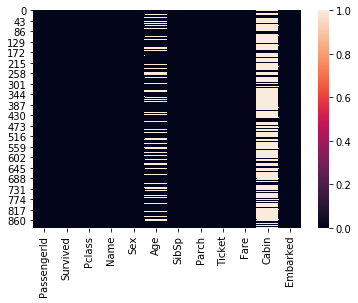

In [6]:
sns.heatmap(df.isnull())

Observation: On observing this heatmap, we get to know that there are some null values present in Age and Cabin column. Missing entities are maximum in Cabin column. So we may drop this column. But in case of Age we can replace it with average value.

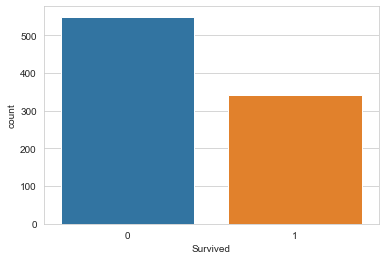

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=df)

Observation: The above graph shows that approx. 550 people were not survived where 330 people were able to survive.

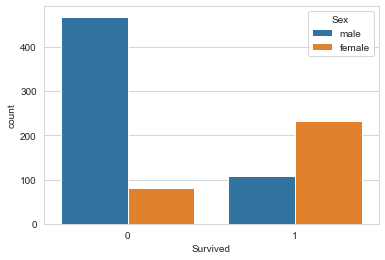

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=df)

Observation: The graph shows that more male were not survived as compare to female.

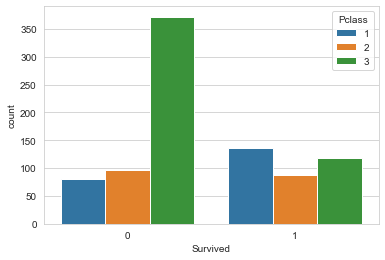

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df)

Observation: The above graph shows that Class3 passengers died more as compare to class1 passengers.

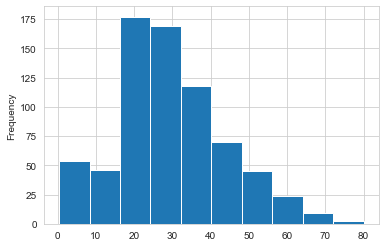

In [10]:
df['Age'].plot.hist(bins=10)

Observation: On observing the above hist graph we get to know that maximum passengers are of age between 20 to 50.

In [11]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

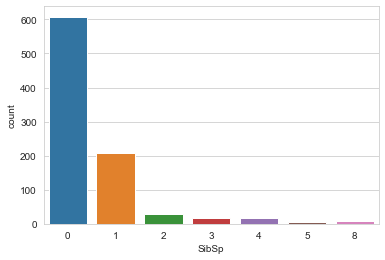

In [58]:
sns.set_style('whitegrid')
sns.countplot(x='SibSp',data=df)

Observation: The above graph shows that there were 600 people travelling alone, 200(approx) people were travelling with their spouse and very few people were travelling with 2 or 3 member of their family. 

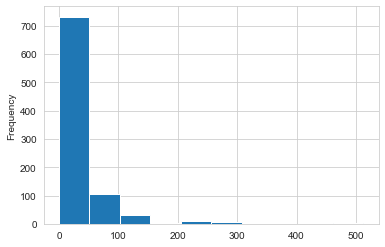

In [59]:
df['Fare'].plot.hist(bins=10)

Observation: The above graph shows that the maximum fare of ticket were up 50.

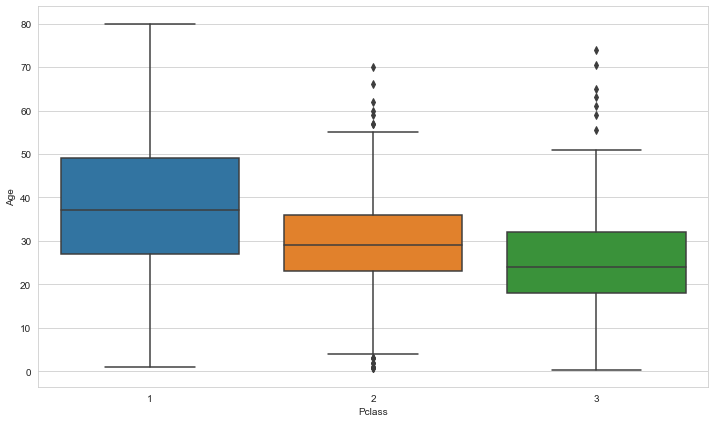

In [14]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=df)

In [15]:
def replace_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
                  
        else:
            return 24
    else:
            return Age

In [16]:
df['Age']=df[['Age','Pclass']].apply(replace_age,axis=1)

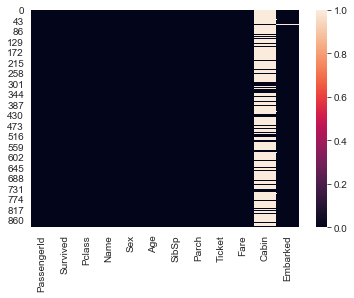

In [17]:
sns.heatmap(df.isnull())

In [18]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
#Removing column having maximum null values.
df1=df.drop('Cabin',axis=1)

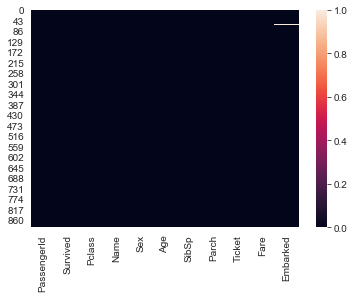

In [20]:
sns.heatmap(df1.isnull())

In [21]:
df1.dropna(inplace=True)

In [22]:
df1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [23]:
#droping columns that make very less impact on output
df2=df1.drop(columns=['Name','Ticket','PassengerId'],axis=1)

In [24]:
#applying technique of label Encoder to convert object datatype into int data type.
from sklearn.preprocessing import LabelEncoder

In [25]:
le=LabelEncoder()
df2['Sex']=le.fit_transform(df2['Sex'])

df2['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 889, dtype: int32

In [26]:
df2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S
887,1,1,0,19.0,0,0,30.0000,S
888,0,3,0,24.0,1,2,23.4500,S
889,1,1,1,26.0,0,0,30.0000,C


In [27]:
df2['Embarked']=le.fit_transform(df2['Embarked'])

df2['Embarked']

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: Embarked, Length: 889, dtype: int32

In [28]:
df2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,24.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


In [29]:
df2

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,24.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


In [30]:
df3=df2.drop(columns=['Survived'],axis=1)

In [31]:
x= df2.iloc[:,1:-1]
x

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833
2,3,0,26.0,0,0,7.9250
3,1,0,35.0,1,0,53.1000
4,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000
887,1,0,19.0,0,0,30.0000
888,3,0,24.0,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [32]:
y= df2.iloc[:,0]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [33]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [35]:
lr=LogisticRegression()

In [36]:
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

0.7949579831932773

In [37]:
predlr = lr.predict(x_test)

In [38]:
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.8163265306122449
[[158  26]
 [ 28  82]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       184
           1       0.76      0.75      0.75       110

    accuracy                           0.82       294
   macro avg       0.80      0.80      0.80       294
weighted avg       0.82      0.82      0.82       294



In [39]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [40]:
predgb=lr.predict(x_test)

In [41]:
print(accuracy_score(y_test,predgb))
print(confusion_matrix(y_test,predgb))
print(classification_report(y_test,predgb))

0.8163265306122449
[[158  26]
 [ 28  82]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.85       184
           1       0.76      0.75      0.75       110

    accuracy                           0.82       294
   macro avg       0.80      0.80      0.80       294
weighted avg       0.82      0.82      0.82       294



In [42]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import warnings
warnings.filterwarnings ('ignore')

In [43]:
from sklearn.model_selection import GridSearchCV
parameters={'kernel':('linear','poly','rbf'),'C':[1,10]}
svc=SVC()
clf=GridSearchCV(svc,parameters)
clf.fit(x,y)
print(clf.best_score_)
print(clf.best_estimator_.kernel)
print(clf.best_params_)

0.7873992255443407
linear
{'C': 1, 'kernel': 'linear'}


In [44]:
dtc=DecisionTreeClassifier()
grid_param={'criterion':['gini','entropy']}
gd_sr=GridSearchCV(estimator=dtc,param_grid=grid_param,scoring='accuracy',cv=5)
gd_sr.fit(x,y)
print(gd_sr.best_score_)
print(gd_sr.best_estimator_.criterion)
print(gd_sr.best_params_)

0.7806957404938741
entropy
{'criterion': 'entropy'}


In [45]:
from sklearn.neighbors import KNeighborsClassifier
dtc=KNeighborsClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.7108843537414966
[[146  38]
 [ 47  63]]
              precision    recall  f1-score   support

           0       0.76      0.79      0.77       184
           1       0.62      0.57      0.60       110

    accuracy                           0.71       294
   macro avg       0.69      0.68      0.69       294
weighted avg       0.71      0.71      0.71       294



In [46]:

    svc=SVC(kernel='linear')
    svc.fit(x_train,y_train)
    predsvc=svc.predict(x_test)
    print(accuracy_score(y_test,predsvc))
    print(confusion_matrix(y_test,predsvc))
    print(classification_report(y_test,predsvc))

0.7959183673469388
[[154  30]
 [ 30  80]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       184
           1       0.73      0.73      0.73       110

    accuracy                           0.80       294
   macro avg       0.78      0.78      0.78       294
weighted avg       0.80      0.80      0.80       294



In [47]:
#cross validation

In [48]:
from sklearn.model_selection import cross_val_score

In [49]:
gb=GaussianNB()
score=cross_val_score(gb,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.75842697 0.79775281 0.78651685 0.78651685 0.79661017]
0.7851647305275187
0.014198748565541243


In [50]:
#Ensemble Technique
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=130,random_state=40)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)

In [51]:
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.7857142857142857
[[152  32]
 [ 31  79]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       184
           1       0.71      0.72      0.71       110

    accuracy                           0.79       294
   macro avg       0.77      0.77      0.77       294
weighted avg       0.79      0.79      0.79       294



In [52]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))


0.8197278911564626
[[158  26]
 [ 27  83]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.86       184
           1       0.76      0.75      0.76       110

    accuracy                           0.82       294
   macro avg       0.81      0.81      0.81       294
weighted avg       0.82      0.82      0.82       294



In [53]:
ad1=AdaBoostClassifier(n_estimators=100)
ad1.fit(x_train,y_train)
ad_pred=ad1.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))


0.8197278911564626
[[155  29]
 [ 24  86]]
              precision    recall  f1-score   support

           0       0.87      0.84      0.85       184
           1       0.75      0.78      0.76       110

    accuracy                           0.82       294
   macro avg       0.81      0.81      0.81       294
weighted avg       0.82      0.82      0.82       294



In [54]:
ad1=AdaBoostClassifier(n_estimators=100)
score=cross_val_score(ad1,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.76966292 0.81460674 0.8258427  0.84269663 0.83615819]
0.8177934361708882
0.02588020617063069


In [55]:
ad=AdaBoostClassifier()
score=cross_val_score(ad,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.75842697 0.8258427  0.81460674 0.8258427  0.84745763]
0.8144353456484479
0.029958952988972266


In [56]:
#saving the model
from sklearn.externals import joblib
joblib.dump(ad1,'titanic_train.pkl')

['titanic_train.pkl']

5